In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score , recall_score , f1_score , confusion_matrix
from sklearn.metrics import roc_curve , auc
import matplotlib.pyplot as plt
import seaborn as snb

In [2]:
# Load the dataset
df = pd.read_csv('inf.csv')
df = df.drop(['Unnamed: 0'],axis = 1)

In [3]:
# Split the data into features and target variable
X = df.drop(['Pathogen Test Result'],axis = 1)
Y = df['Pathogen Test Result']

In [4]:
# split dataset
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size= 0.3, random_state=2)

In [5]:
# Create Random Forest and SVM classifiers
rf = RandomForestClassifier(n_estimators=100)
svm = SVC(kernel='linear', C=1)

In [6]:
# Train classifiers on training data
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [7]:
# Make predictions on testing data
rf_preds = rf.predict(X_test)
svm_preds = svm.predict(X_test)

In [8]:
# Combine predictions using majority voting
ensemble_preds = []
for i in range(len(X_test)):
    if rf_preds[i] == svm_preds[i]:
        ensemble_preds.append(rf_preds[i])
    else:
        ensemble_preds.append(rf_preds[i])  # You can also use svm_preds here

In [9]:
# Calculate accuracy of ensemble predictions
ensemble_acc = accuracy_score(y_test, ensemble_preds)
print("Ensemble accuracy:", round(ensemble_acc*100,2),'%')

Ensemble accuracy: 87.24 %


array([[2274,  287],
       [ 422, 2573]], dtype=int64)

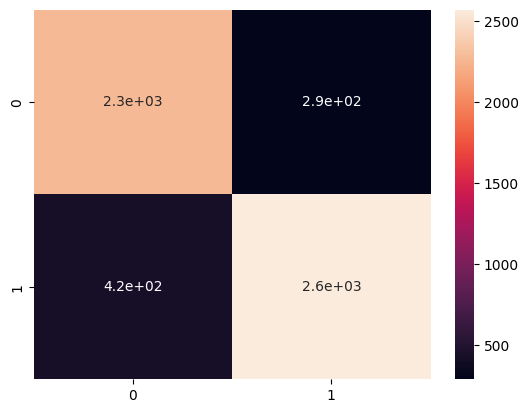

In [10]:
cm = confusion_matrix(y_test, ensemble_preds)
snb.heatmap(cm,annot=True)
cm

In [11]:
# precision for testing
print('for testing : ' , round(precision_score(y_test , ensemble_preds)*100,2),'%')

for testing :  89.97 %


In [12]:
# Recall for testing 
print('for testing : ' , round(recall_score(y_test , ensemble_preds)*100,2),'%')

for testing :  85.91 %


In [13]:
# f1_score for testing 
print('for testing : ' , round(f1_score(y_test , ensemble_preds)*100,2),'%')

for testing :  87.89 %


In [14]:
# for sensitivity and specificity
tn, fp, fn, tp = cm.ravel()

In [15]:
specificity = tn / (tn+fp)
print('specificity for data is : ',round(specificity*100,2),'%')

specificity for data is :  88.79 %


In [16]:
sensitivity = tp / (tp+fn)
print('sensitivity for data is : ',round(sensitivity*100,2),'%')

sensitivity for data is :  85.91 %


In [17]:
#ROC and AUC
fpr, tpr, threshold = roc_curve(y_test,ensemble_preds)
roc_auc = auc(fpr, tpr)

In [18]:
print('Area under curve : ',round(roc_auc*100,2),'%')

Area under curve :  87.35 %


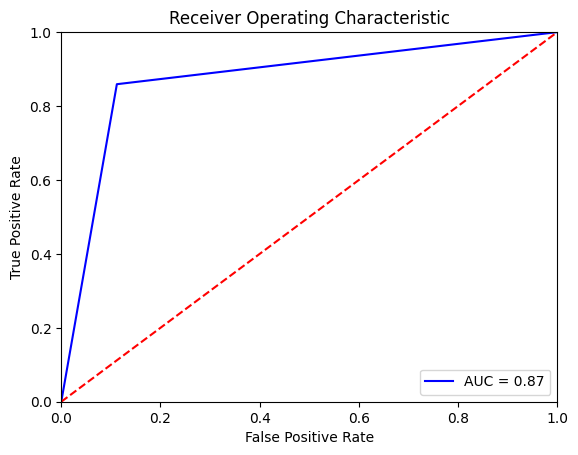

In [19]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()